# Multiple Regression

- Do age and IQ scores effectively predict GPA?
- Do weight, height, and age explain the variance in cholesterol levels?

## Learning goals:

For a multivariable linear regression, students will be able to:

* compare and contrast with univariable linear regression
* write an example of the equation
* develop one with statsmodels 
* assess the model fit 
* interpret coefficients
* validate the model
* export the model

### Keyterms
- Multivariable
- Train-test split
- MSE: Mean squared error
- RSME: Root squared mean error

## Scenario

The University of San Paulo in Brazil is likes to party. We are a contracted beer supplier to the University and we want to make sure we have enough supply on hand. We are hoping to build a model that can predict beer consumption given other variables. 


![beer](pexels-photo-544988-small.jpeg)
More about the dataset can be found [here](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)

###  Prior Knowledge


Before looking at the dataset, what variables do we think might be in there? What might make a student drink more? 

#### Step 1:  Discussion 

- compare and contrast with univariable linear regression
- How is this different from the regression we've done before?
- Here, you'll explore how to perform linear regressions using multiple independent variables to better predict a target variable.

#### Step 2:  Develop a multivariable regression model with statsmodels 

**Load Libraries and load in data**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')

In [3]:
df.head(20)
#df.info()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


### Small Data Cleaning Tasks:
- Drop Date
- convert all the columns to numeric (replace ',' with '.')
- rename columns to be `name = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']`

In [4]:
df=df.drop(columns=['Data'])
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [5]:
df=df.applymap(lambda x : x.replace(",",".") if type(x)==str else x)
for col in df.columns:
    df[col]=df[col].astype('float')

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(6)
memory usage: 20.0 KB


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


**Check** for NaNs

In [8]:
df.isna().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(365, 6)

### Everyone write an example of an equation for our multiple regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

<img src="https://miro.medium.com/max/1400/1*d0icRnPHWjHSNXxuoYT5Vg.png" width=450 />

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

What would the formula be with real values?

**Send your equations to me via zoom or slack and I will paste them into the notebook**

Equations here

>

![statsmodels](https://www.statsmodels.org/stable/_static/statsmodels_hybi_banner.png)

Okay, now here's how you can use format and join to make the formula with **code**:

In [11]:
formula = 'target~{}'.format("+".join(df.columns[:-1]))
formula
target='Consumo de cerveja (litros)'

In [12]:
model = sm.OLS(df[target], df.drop(target, axis=1)).fit()

NameError: name 'sm' is not defined

In [ ]:
model.summary()

### What's the actual multivariable  linear regression equation with the coefficients?

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

#### Step 3: Assess the model fit
Demonstrate and Apply:

**Discussion:**

In groups of 2 or 3 write a synopsis of the following summary

* What can you say about the coefficients?

* What do the p-values tell us?

* What does R^2 represent

* What other insights do you notice?





#### Step 4: Validate the model 
![scikit](https://cdn-images-1.medium.com/max/1200/1*-FHtcdQljtGKQGm77uDIyQ.png)
- Build LinReg Model with Scikit-Learn
- Check some of the linear regression assumptions


[Documentation for sklearn `LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [14]:
linreg = LinearRegression()

In [15]:
X = df.drop("target", axis=1)
y = df.target

KeyError: "['target'] not found in axis"

#### Train test split
[sklearn function documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### So far we've used the whole dataset to build a model
![img1](whole_data.png)

#### But no promise how it will perform on new data

![img2](new_data.png)

#### So we split to help evaluate
![img3](tt_split.png)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

NameError: name 'X' is not defined

In [17]:
# use fit to form model
linreg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

### Model evaluation

So far this looks very similar to `Statsmodels`.
Can you use the `LinearRegression` documentation to find:
- model coefficients?
- coefficients p-values?

In [18]:
# gives you r squared of the model
linreg.score(X_test, y_test)

NameError: name 'X_test' is not defined

`score` here returns the R^2. 

How does it differ from when you use the whole dataset?

#### Saving model

![pickle](https://lovelygreens.com/wp-content/uploads/grandmas-dill-pickles-750x440.jpg)

```
model = LinearRegression()
model.fit(X_train, y_train)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
```


then to reload later:

```
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
```



### Integration:

Repeat this process for concrete mixture. 
What combination of materials creates the strongest concrete compressive strength?

The documentation can be found [here](http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)
![test](building-construction-building-site-constructing-small.jpg)

In [19]:
df2 = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [20]:
df2.columns = ['cement',"slag", 'ash', 'water','sp', 'ca', 'fa', 'age', 'strength']

In [21]:
X = df2.drop("strength", axis=1)
y = df2.strength

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
formula = 'strength~{}'.format("+".join(df2.columns[:-1]))


In [24]:
regression=smf.ols(formula=formula, data=df2).fit()

In [32]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(regression, f)

In [33]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 27 Aug 2019   Prob (F-statistic):          6.76e-206
Time:                        14:40:12   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.1638     26.588     -0.871      0.384     -75.338      29.010
cement         0.1198      0.008     14.110      0.000       0.103       0.136
slag           0.1038      0.010     10.245      0.000       0.084       0.124
ash            0.0879      0.013      6.988      0.000       0.063       0.113
water         -0.1503      0.040     -3.741      0.000      -0.229      -0.071
sp             0.2907      0.093      3.110      0.002       0.107       0.474
ca             0.0180      0.009      1.919      0.055      -0.000       0.036
fa             0.0202      0.011      1.883      0.060      -0.001       0.041
age            0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

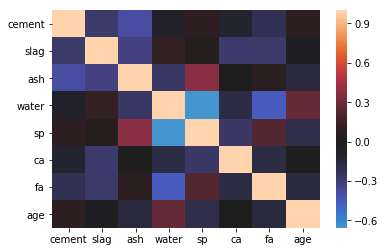

In [29]:
import seaborn as sns
sns.heatmap(df2.drop('strength', axis=1).corr(), center=0);

In [26]:
df2.corr()

,cement,slag,ash,water,sp,ca,fa,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
sp,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
ca,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fa,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


### Assessment

### Reflection

### Resources

Resources
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

Full code implementation of Linear Regression
Full code — https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation

Multiple regression explained
https://www.statisticssolutions.com/what-is-multiple-linear-regression/
